## Masks Operands

In [14]:
import numpy as np

mask_one = np.random.choice([True,False],size = 10)
mask_two = np.random.choice([True,False],size = 10)

mask_one,mask_two

(array([ True, False,  True,  True,  True, False,  True, False,  True,
         True]),
 array([ True, False, False,  True,  True,  True,  True, False,  True,
         True]))

And operator

In [15]:
mask_one & mask_two

array([ True, False, False,  True,  True, False,  True, False,  True,
        True])

Or operator

In [3]:
mask_one | mask_two

array([ True,  True, False, False,  True, False,  True, False,  True,
       False])

## String formating

In [16]:
perspolis_goals = 7
assad_goals = 3

In [20]:
'Perspolis made {0} goals while Assad made {1}. It is a good result {0}-{1}'.format(perspolis_goals,assad_goals)

'Perspolis made 7 goals while Assad made 3. It is a good result 7-3'

In [18]:
goals = 3

'Perspolis made {0} goals while Assad made {0}'.format(goals)

'Perspolis made 3 goals while Assad made 3'

## Functions with not certain arguments

### Optional arguments

In [22]:
def team_point(wins, ties, **kwargs):
    each_win_point = kwargs.get('win_score',3)
    each_tie_point = kwargs.get('tie_point',1)
    
    points = wins * each_win_point + ties * each_tie_point 
    return points

In [23]:
team_point(1,1)

4

In [25]:
team_point(1,1, win_score = 4, tie_point = 2)

6

### multiple arguments

In [9]:
def total_win_points(*args):
    points = sum(args)
    return 3*points

In [26]:
total_win_points(3,2,3,6,7,10,2,3)

108

### Combined example

In [28]:
def total_win_points(*args, **kwargs):
    each_win_point = kwargs.get('win_point',3)
    points = sum(args)
    return points * each_win_point

In [29]:
total_win_points(1,2,4,4, win_point = 4)

44

## Animation in Jupyter Notebook

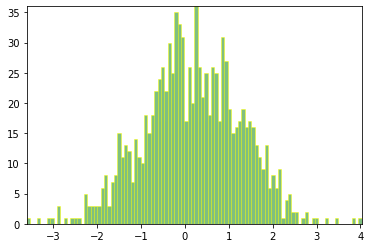

In [31]:
"""
==================
Animated histogram
==================

Use a path patch to draw a bunch of rectangles for an animated histogram.
"""

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation


# Fixing random state for reproducibility
np.random.seed(19680801)

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = bins[:-1]
right = bins[1:]
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

###############################################################################
# Here comes the tricky part -- we have to set up the vertex and path codes
# arrays using `.Path.MOVETO`, `.Path.LINETO` and `.Path.CLOSEPOLY` for each
# rect.
#
# * We need 1 ``MOVETO`` per rectangle, which sets the initial point.
# * We need 3 ``LINETO``'s, which tell Matplotlib to draw lines from
#   vertex 1 to vertex 2, v2 to v3, and v3 to v4.
# * We then need one ``CLOSEPOLY`` which tells Matplotlib to draw a line from
#   the v4 to our initial vertex (the ``MOVETO`` vertex), in order to close the
#   polygon.
#
# .. note::
#
#   The vertex for ``CLOSEPOLY`` is ignored, but we still need a placeholder
#   in the ``verts`` array to keep the codes aligned with the vertices.
nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.full(nverts, path.Path.LINETO)
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

###############################################################################
# To animate the histogram, we need an ``animate`` function, which generates
# a random set of numbers and updates the locations of the vertices for the
# histogram (in this case, only the heights of each rectangle). ``patch`` will
# eventually be a `.Patch` object.
patch = None


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

###############################################################################
# And now we build the `.Path` and `.Patch` instances for the histogram using
# our vertices and codes. We add the patch to the `~.axes.Axes` instance, and
# setup the `.FuncAnimation` with our ``animate`` function.
fig, ax = plt.subplots()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

ani = animation.FuncAnimation(fig, animate, 50, repeat=False, blit=True)


from IPython.display import HTML
HTML(ani.to_jshtml())